In [100]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.linalg import inv

In [101]:
data= pd.read_csv("/home/sysadm/Downloads/annotated_points_np_200.csv")
data

,x,y,labels
0,1.077445,28.587662,1.0
1,1.038266,27.857143,1.0
2,0.685647,27.207792,1.0
3,0.959906,25.340909,1.0
4,0.881546,24.204545,1.0
...,...,...,...
195,28.385791,5.698052,2.0
196,25.917461,3.668831,2.0
197,23.096513,3.019481,2.0
198,20.549824,2.532468,2.0


In [102]:
data.labels[data.labels ==2] = -1
data

,x,y,labels
0,1.077445,28.587662,1.0
1,1.038266,27.857143,1.0
2,0.685647,27.207792,1.0
3,0.959906,25.340909,1.0
4,0.881546,24.204545,1.0
...,...,...,...
195,28.385791,5.698052,-1.0
196,25.917461,3.668831,-1.0
197,23.096513,3.019481,-1.0
198,20.549824,2.532468,-1.0


In [103]:
np.ones(200)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [104]:
np.array(data.x)

array([ 1.07744547,  1.03826564,  0.68564712,  0.95990597,  0.8815463 ,
        0.72482696,  0.64646728,  0.64646728,  2.33120021,  2.29202037,
        2.29202037,  2.33120021,  2.60545906,  2.7621784 ,  3.07561708,
        3.62413478,  3.74167428,  4.48609116,  4.52527099,  4.68199034,
        4.68199034,  3.78085412,  3.66331461,  3.58495494,  3.07561708,
        2.52709939,  1.27334465,  1.03826564,  1.07744547,  1.70432284,
        2.52709939,  3.62413478,  3.85921379,  3.74167428,  4.01593313,
        4.95624918,  4.99542902,  5.38722737,  5.38722737,  4.83870968,
        4.68199034,  3.54577511,  3.54577511,  2.0961212 ,  1.66514301,
        5.66148622,  6.13164425,  6.56262244,  6.91524096,  6.91524096,
        6.91524096,  5.8573854 ,  4.99542902,  3.15397675,  0.95990597,
        1.86104218,  2.87971791,  6.75852161,  8.16899569,  8.56079404,
        8.67833355,  8.67833355,  8.09063602,  7.7380175 ,  7.89473684,
        7.85555701,  7.65965783,  7.26785947,  7.7380175 ,  7.58

In [105]:
np.array(data.y)

array([28.58766234, 27.85714286, 27.20779221, 25.34090909, 24.20454545,
       23.55519481, 21.68831169, 21.68831169, 20.79545455, 22.17532468,
       23.23051948, 24.44805195, 25.90909091, 25.99025974, 26.07142857,
       24.52922078, 23.7987013 , 20.87662338, 19.41558442, 15.35714286,
       13.97727273, 13.97727273, 14.22077922, 14.54545455, 15.92532468,
       16.33116883, 16.89935065, 17.46753247, 18.92857143, 19.49675325,
       19.00974026, 18.27922078, 19.57792208, 21.68831169, 22.25649351,
       23.63636364, 23.63636364, 24.77272727, 25.34090909, 26.88311688,
       27.20779221, 27.85714286, 27.85714286, 27.61363636, 25.99025974,
       16.73701299, 18.6038961 , 20.87662338, 22.90584416, 25.25974026,
       27.69480519, 28.91233766, 29.23701299, 29.31818182, 13.6525974 ,
       13.00324675, 12.92207792, 15.84415584, 18.11688312, 21.93181818,
       24.20454545, 26.72077922, 28.66883117, 27.20779221, 25.82792208,
       24.04220779, 21.52597403, 18.76623377, 15.51948052, 13.16

In [106]:
vector = pd.DataFrame({'x':np.array(data.x),'y':np.array(data.y),'ones':np.ones(200)})
vector

,x,y,ones
0,1.077445,28.587662,1.0
1,1.038266,27.857143,1.0
2,0.685647,27.207792,1.0
3,0.959906,25.340909,1.0
4,0.881546,24.204545,1.0
...,...,...,...
195,28.385791,5.698052,1.0
196,25.917461,3.668831,1.0
197,23.096513,3.019481,1.0
198,20.549824,2.532468,1.0


In [107]:
vector.to_numpy()

array([[ 1.07744547, 28.58766234,  1.        ],
       [ 1.03826564, 27.85714286,  1.        ],
       [ 0.68564712, 27.20779221,  1.        ],
       [ 0.95990597, 25.34090909,  1.        ],
       [ 0.8815463 , 24.20454545,  1.        ],
       [ 0.72482696, 23.55519481,  1.        ],
       [ 0.64646728, 21.68831169,  1.        ],
       [ 0.64646728, 21.68831169,  1.        ],
       [ 2.33120021, 20.79545455,  1.        ],
       [ 2.29202037, 22.17532468,  1.        ],
       [ 2.29202037, 23.23051948,  1.        ],
       [ 2.33120021, 24.44805195,  1.        ],
       [ 2.60545906, 25.90909091,  1.        ],
       [ 2.7621784 , 25.99025974,  1.        ],
       [ 3.07561708, 26.07142857,  1.        ],
       [ 3.62413478, 24.52922078,  1.        ],
       [ 3.74167428, 23.7987013 ,  1.        ],
       [ 4.48609116, 20.87662338,  1.        ],
       [ 4.52527099, 19.41558442,  1.        ],
       [ 4.68199034, 15.35714286,  1.        ],
       [ 4.68199034, 13.97727273,  1.   

In [110]:
data_1 = data.to_numpy()
data_1

array([[ 1.07744547, 28.58766234,  1.        ],
       [ 1.03826564, 27.85714286,  1.        ],
       [ 0.68564712, 27.20779221,  1.        ],
       [ 0.95990597, 25.34090909,  1.        ],
       [ 0.8815463 , 24.20454545,  1.        ],
       [ 0.72482696, 23.55519481,  1.        ],
       [ 0.64646728, 21.68831169,  1.        ],
       [ 0.64646728, 21.68831169,  1.        ],
       [ 2.33120021, 20.79545455,  1.        ],
       [ 2.29202037, 22.17532468,  1.        ],
       [ 2.29202037, 23.23051948,  1.        ],
       [ 2.33120021, 24.44805195,  1.        ],
       [ 2.60545906, 25.90909091,  1.        ],
       [ 2.7621784 , 25.99025974,  1.        ],
       [ 3.07561708, 26.07142857,  1.        ],
       [ 3.62413478, 24.52922078,  1.        ],
       [ 3.74167428, 23.7987013 ,  1.        ],
       [ 4.48609116, 20.87662338,  1.        ],
       [ 4.52527099, 19.41558442,  1.        ],
       [ 4.68199034, 15.35714286,  1.        ],
       [ 4.68199034, 13.97727273,  1.   

In [118]:
self_2 = vector.to_numpy()
self_2

array([[ 1.07744547, 28.58766234,  1.        ],
       [ 1.03826564, 27.85714286,  1.        ],
       [ 0.68564712, 27.20779221,  1.        ],
       [ 0.95990597, 25.34090909,  1.        ],
       [ 0.8815463 , 24.20454545,  1.        ],
       [ 0.72482696, 23.55519481,  1.        ],
       [ 0.64646728, 21.68831169,  1.        ],
       [ 0.64646728, 21.68831169,  1.        ],
       [ 2.33120021, 20.79545455,  1.        ],
       [ 2.29202037, 22.17532468,  1.        ],
       [ 2.29202037, 23.23051948,  1.        ],
       [ 2.33120021, 24.44805195,  1.        ],
       [ 2.60545906, 25.90909091,  1.        ],
       [ 2.7621784 , 25.99025974,  1.        ],
       [ 3.07561708, 26.07142857,  1.        ],
       [ 3.62413478, 24.52922078,  1.        ],
       [ 3.74167428, 23.7987013 ,  1.        ],
       [ 4.48609116, 20.87662338,  1.        ],
       [ 4.52527099, 19.41558442,  1.        ],
       [ 4.68199034, 15.35714286,  1.        ],
       [ 4.68199034, 13.97727273,  1.   

In [131]:
vector = pd.DataFrame({'x':np.array(data.x),'y':np.array(data.y),'ones':np.ones(200)})
vector

,x,y,ones
0,1.077445,28.587662,1.0
1,1.038266,27.857143,1.0
2,0.685647,27.207792,1.0
3,0.959906,25.340909,1.0
4,0.881546,24.204545,1.0
...,...,...,...
195,28.385791,5.698052,1.0
196,25.917461,3.668831,1.0
197,23.096513,3.019481,1.0
198,20.549824,2.532468,1.0


In [136]:
def direction(self):
    self_1 = self.to_numpy()
    vector = pd.DataFrame({'x':np.array(self.x),'y':np.array(self.y),'ones':np.ones(200)})
    self_2 = vector.to_numpy()
    w = [0,0,0]
    f = 1
    while(f == 1):
        f = 0
        for t in range(0,200):
            if (np.matmul(self_2[t].T,w))*self_1[t,2] <= 0:
                w = w +(self_1[t][2]*self_2[t])
                f = 1
            #else:
                #w = w
    return w



In [137]:
d = direction(data)
d

array([-152.40955988,   66.08766234,  656.        ])

In [138]:
np.linspace(1,30,1000)

array([ 1.        ,  1.02902903,  1.05805806,  1.08708709,  1.11611612,
        1.14514515,  1.17417417,  1.2032032 ,  1.23223223,  1.26126126,
        1.29029029,  1.31931932,  1.34834835,  1.37737738,  1.40640641,
        1.43543544,  1.46446446,  1.49349349,  1.52252252,  1.55155155,
        1.58058058,  1.60960961,  1.63863864,  1.66766767,  1.6966967 ,
        1.72572573,  1.75475475,  1.78378378,  1.81281281,  1.84184184,
        1.87087087,  1.8998999 ,  1.92892893,  1.95795796,  1.98698699,
        2.01601602,  2.04504505,  2.07407407,  2.1031031 ,  2.13213213,
        2.16116116,  2.19019019,  2.21921922,  2.24824825,  2.27727728,
        2.30630631,  2.33533534,  2.36436436,  2.39339339,  2.42242242,
        2.45145145,  2.48048048,  2.50950951,  2.53853854,  2.56756757,
        2.5965966 ,  2.62562563,  2.65465465,  2.68368368,  2.71271271,
        2.74174174,  2.77077077,  2.7997998 ,  2.82882883,  2.85785786,
        2.88688689,  2.91591592,  2.94494494,  2.97397397,  3.00

In [134]:
def plot(self):
    plt.scatter(self.iloc[0:100]['x'],self.iloc[0:100]['y'],color = 'r',marker = '*',label = "class1")

    plt.scatter(self.iloc[100:200]['x'],self.iloc[100:200]['y'],color = 'g',label = "class2")
    
    plt.plot(np.linspace(5,25,30),((-d[2] - d[0]*np.linspace(1,17.5,30))*(1/d[1])))

    plt.subplots_adjust(top = 1.8,right =2)

    plt.legend()
    plt.show()
    

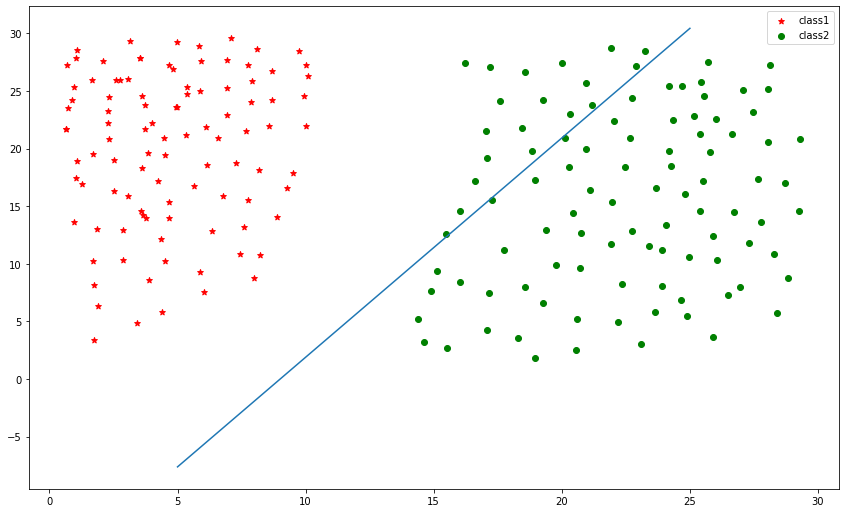

In [135]:
plot(data)